In [115]:
%pip install --quiet --upgrade pip
%pip install --quiet pandas matplotlib seaborn scikit-learn geopandas geodatasets folium branca plotly nbformat statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from folium.features import DivIcon
from branca.colormap import LinearColormap
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PRÁCTICA DE VISUALIZACIÓN DE DATOS: PARTE 1

## Analysis and preparation of the Global CO2 and Greenhouse Gas Emissions dataset

In [117]:
# Create a list of 27 European countries to filter the chosen DataFrames:
europe_countries = ['Spain', 'France', 'Germany', 'Italy', 'Netherlands', 'Belgium', 'Austria', 'Sweden', 'Norway', 'Finland', 'Denmark', 'United Kingdom', 'Greece', 'Portugal', 'Ireland', 'Switzerland', 'Poland', 'Czech Republic', 'Hungary', 'Slovakia', 'Romania', 'Bulgaria', 'Croatia', 'Slovenia', 'Lithuania', 'Latvia', 'Estonia']

In [118]:
# We import the data from the CO2 CSV file and filter it for European countries:
data_co2 = pd.read_csv('./data/owid-co2-data.csv')
data_co2_eu = data_co2[data_co2['country'].isin(europe_countries)]

### Data Preprocessing and exploration

In [119]:
# We show the first 10 rows of the filtered DataFrame:
data_co2_eu.head(10)

country  year iso_code  population           gdp  cement_co2  \
3441  Austria  1807      AUT   3124310.0           NaN         NaN   
3442  Austria  1819      AUT   3349015.0           NaN         NaN   
3443  Austria  1820      AUT   3367266.0  6.539229e+09         NaN   
3444  Austria  1821      AUT   3385004.0           NaN         NaN   
3445  Austria  1822      AUT   3402223.0           NaN         NaN   
3446  Austria  1823      AUT   3418916.0           NaN         NaN   
3447  Austria  1824      AUT   3435691.0           NaN         NaN   
3448  Austria  1825      AUT   3452549.0           NaN         NaN   
3449  Austria  1826      AUT   3469489.0           NaN         NaN   
3450  Austria  1827      AUT   3486512.0           NaN         NaN   

      cement_co2_per_capita    co2  co2_growth_abs  co2_growth_prct  ...  \
3441                    NaN  0.169             NaN              NaN  ...   
3442                    NaN  0.253             NaN           50.000  ...   
3443                    NaN  0.333           0.081           31.884  ...   
3444                    NaN  0.359           0.026            7.692  ...   
3445                    NaN  0.366           0.007            2.041  ...   
3446                    NaN  0.348          -0.018           -5.000  ...   
3447                    NaN  0.399           0.051           14.737  ...   
3448                    NaN  0.403           0.004            0.917  ...   
3449                    NaN  0.458           0.055           13.636  ...   
3450                    NaN  0.476           0.018            4.000  ...   

      share_global_other_co2  share_of_temperature_change_from_ghg  \
3441                     NaN                                   NaN   
3442                     NaN                                   NaN   
3443                     NaN                                   NaN   
3444                     NaN                                   NaN   
3445                     NaN                                   NaN   
3446                     NaN                                   NaN   
3447                     NaN                                   NaN   
3448                     NaN                                   NaN   
3449                     NaN                                   NaN   
3450                     NaN                                   NaN   

      temperature_change_from_ch4  temperature_change_from_co2  \
3441                          NaN                          NaN   
3442                          NaN                          NaN   
3443                          NaN                          NaN   
3444                          NaN                          NaN   
3445                          NaN                          NaN   
3446                          NaN                          NaN   
3447                          NaN                          NaN   
3448                          NaN                          NaN   
3449                          NaN                          NaN   
3450                          NaN                          NaN   

      temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
3441                          NaN                          NaN        NaN   
3442                          NaN                          NaN        NaN   
3443                          NaN                          NaN        NaN   
3444                          NaN                          NaN        NaN   
3445                          NaN                          NaN        NaN   
3446                          NaN                          NaN        NaN   
3447                          NaN                          NaN        NaN   
3448                          NaN                          NaN        NaN   
3449                          NaN                          NaN        NaN   
3450                          NaN                          NaN        NaN   

      total_ghg_excluding_lucf  trade_co2  trade_co2

In [120]:
# We show the first row of each country in the filtered DataFrame:
data_co2_eu.groupby('country').first().reset_index()

country  year iso_code  population           gdp  cement_co2  \
0          Austria  1807      AUT   3124310.0  6.539229e+09       0.258   
1          Belgium  1802      BEL   3267947.0  1.159920e+10       1.505   
2         Bulgaria  1850      BGR   2495877.0  3.462654e+09       0.055   
3          Croatia  1850      HRV   1597319.0  1.062954e+10       0.387   
4          Denmark  1843      DNK   1398265.0  3.275376e+09       0.385   
5          Estonia  1830      EST    376880.0  1.946813e+10       0.006   
6          Finland  1850      FIN   1622623.0  2.472932e+09       0.138   
7           France  1802      FRA  29217510.0  5.653125e+10       2.097   
8          Germany  1792      DEU  18000000.0  3.915066e+10       3.812   
9           Greece  1850      GRC   3044219.0  4.891708e+09       0.073   
10         Hungary  1830      HUN   4460196.0  1.030150e+10       0.211   
11         Ireland  1850      IRL   6891380.0  1.533035e+10       0.000   
12           Italy  1850      ITA  24460960.0  6.387268e+10       1.519   
13          Latvia  1830      LVA    695058.0  3.028147e+10       0.004   
14       Lithuania  1830      LTU    901892.0  3.928090e+10       0.014   
15     Netherlands  1846      NLD   3011544.0  1.080595e+10       0.000   
16          Norway  1829      NOR   1106700.0  1.619684e+09       0.134   
17          Poland  1800      POL   9000000.0  8.528468e+09       0.542   
18        Portugal  1850      PRT   3820021.0  5.609053e+09       0.036   
19         Romania  1850      ROU   7997430.0  3.322798e+09       0.164   
20        Slovakia  1850      SVK   2392070.0  6.078383e+10       0.000   
21        Slovenia  1850      SVN    610971.0  5.859764e+09       0.073   
22           Spain  1830      ESP  13041601.0  2.264679e+10       0.763   
23          Sweden  1834      SWE   2972567.0  4.521862e+09       0.111   
24     Switzerland  1850      CHE   2376868.0  5.863698e+09       0.313   
25  United Kingdom  1750      GBR   9288174.0  7.021613e+10       2.173   

    cement_co2_per_capita    co2  co2_growth_abs  co2_growth_prct  ...  \
0                   0.039  0.169           0.081           50.000  ...   
1                   0.190  6.397          -1.733           -3.150  ...   
2                   0.009  0.004           0.000            0.000  ...   
3                   0.121  0.005           0.002            0.000  ...   
4                   0.111  0.136           0.022           16.216  ...   
5                   0.005  0.000           0.000           20.000  ...   
6                   0.041  0.037           0.037          100.000  ...   
7                   0.052  2.239          -0.070           -2.782  ...   
8                   0.057  0.469           0.011            2.344  ...   
9                   0.012  0.169          -0.084          -50.000  ...   
10                  0.025  0.114          -0.044          -38.710  ...   
11                  0.000  0.396           0.000            0.000  ...   
12                  0.038  0.029           0.641         2187.500  ...   
13                  0.002  0.000           0.000           20.661  ...   
14                  0.006  0.000           0.000           20.000  ...   
15                  0.000  2.869           1.000           34.866  ...   
16                  0.049  0.011          -0.004          -33.333  ...   
17                  0.020  0.407           0.037            9.009  ...   
18                  0.005  0.022           0.015           66.667  ...   
19                  0.012  0.004           0.000            0.000  ...   
20                  0.000  0.065           0.149          228.765  ...   
21                  0.061  0.004           0.002            0.000  ...   
22                  0.033  0.004           0.000            0.000  ...   
23                  0.021  0.033          -0.004           33.333  ...   
24                  0.078  0.147           0.059           40.000  ...   
25                  0.047  9.306           0.101            1

In [121]:
# We filter the numerical data, only using specific variables for the correlation matrix:
data_co2_eu_num = data_co2_eu[['gdp', 'population', 'energy_per_gdp', 'consumption_co2', 'co2_per_capita', 'coal_co2_per_capita', 'co2_per_gdp',  'temperature_change_from_co2', 'nitrous_oxide_per_capita', 'temperature_change_from_n2o', 'methane_per_capita', 'temperature_change_from_ch4', 'temperature_change_from_ghg', 'total_ghg']].round(3).copy()

# We show a summary of the data:
data_co2_eu_num.describe().round(3)

gdp    population  energy_per_gdp  consumption_co2  \
count  3.381000e+03  4.839000e+03        1274.000          819.000   
mean   2.360429e+11  1.400097e+07           2.082          185.412   
std    4.742450e+11  1.757739e+07           1.044          241.837   
min    1.540635e+09  3.768800e+05           0.593           11.874   
25%    2.286457e+10  3.130961e+06           1.354           45.606   
50%    7.021613e+10  5.918589e+06           1.745           82.442   
75%    2.097636e+11  1.639210e+07           2.545          216.674   
max    3.885961e+12  8.340856e+07           6.783         1207.438   

       co2_per_capita  coal_co2_per_capita  co2_per_gdp  \
count        4539.000             4539.000     3320.000   
mean            4.125                2.179        0.482   
std             3.974                2.570        0.401   
min             0.000                0.000        0.000   
25%             0.554                0.320        0.212   
50%             3.012                1.208        0.368   
75%             6.928                3.096        0.610   
max            25.534               17.077        3.378   

       temperature_change_from_co2  nitrous_oxide_per_capita  \
count                     4446.000                   806.000   
mean                         0.002                     0.767   
std                          0.005                     0.476   
min                          0.000                     0.269   
25%                          0.000                     0.459   
50%                          0.000                     0.596   
75%                          0.001                     0.956   
max                          0.041                     2.996   

       temperature_change_from_n2o  methane_per_capita  \
count                     4446.000             806.000   
mean                         0.000               1.161   
std                          0.000               0.632   
min                          0.000               0.462   
25%                          0.000               0.851   
50%                          0.000               0.990   
75%                          0.000               1.215   
max                          0.002               4.503   

       temperature_change_from_ch4  temperature_change_from_ghg  total_ghg  
count                     4446.000                     4446.000    806.000  
mean                         0.001                        0.003    166.257  
std                          0.001                        0.007    223.439  
min                         -0.001                       -0.001   -186.660  
25%                          0.000                        0.000     34.990  
50%                          0.000                        0.001     70.160  
75%                          0.001                        0.002    211.918  
max                          0.007                        0.047   1096.990

In [122]:
# We show the data types of the columns:
data_co2_eu_num.dtypes

gdp                            float64
population                     float64
energy_per_gdp                 float64
consumption_co2                float64
co2_per_capita                 float64
coal_co2_per_capita            float64
co2_per_gdp                    float64
temperature_change_from_co2    float64
nitrous_oxide_per_capita       float64
temperature_change_from_n2o    float64
methane_per_capita             float64
temperature_change_from_ch4    float64
temperature_change_from_ghg    float64
total_ghg                      float64
dtype: object

In [123]:
# We check for missing values in the data:
data_co2_eu_num.isnull().sum()

gdp                            1511
population                       53
energy_per_gdp                 3618
consumption_co2                4073
co2_per_capita                  353
coal_co2_per_capita             353
co2_per_gdp                    1572
temperature_change_from_co2     446
nitrous_oxide_per_capita       4086
temperature_change_from_n2o     446
methane_per_capita             4086
temperature_change_from_ch4     446
temperature_change_from_ghg     446
total_ghg                      4086
dtype: int64

In [124]:
# We fill the rows with missing values:
data_co2_eu_num = data_co2_eu_num.fillna(0)

# We convert `population` to int64:
data_co2_eu_num['population'] = data_co2_eu_num['population'].astype('int64')

# We show a new summary of the data:
data_co2_eu_num.describe().round(3)

# We add the year and country column to a new DataFrame based on data_co2_eu_num and show the head and save it for later use:
data_co2_eu_num_with_year_country = data_co2_eu_num.copy()
data_co2_eu_num_with_year_country['year'] = data_co2_eu['year']
data_co2_eu_num_with_year_country['country'] = data_co2_eu['country']
data_co2_eu_num_with_year_country[data_co2_eu_num_with_year_country['country'] == "Spain"].head(10)


gdp  population  energy_per_gdp  consumption_co2  \
41140  0.000000e+00    13041601             0.0              0.0   
41141  0.000000e+00    13128533             0.0              0.0   
41142  0.000000e+00    13216052             0.0              0.0   
41143  0.000000e+00    13304164             0.0              0.0   
41144  0.000000e+00    13392863             0.0              0.0   
41145  2.264679e+10    13482154             0.0              0.0   
41146  0.000000e+00    13572039             0.0              0.0   
41147  0.000000e+00    13662525             0.0              0.0   
41148  0.000000e+00    13753613             0.0              0.0   
41149  0.000000e+00    13845298             0.0              0.0   

       co2_per_capita  coal_co2_per_capita  co2_per_gdp  \
41140           0.000                0.000          0.0   
41141           0.000                0.000          0.0   
41142           0.000                0.000          0.0   
41143           0.000                0.000          0.0   
41144           0.000                0.000          0.0   
41145           0.000                0.000          0.0   
41146           0.002                0.002          0.0   
41147           0.003                0.003          0.0   
41148           0.002                0.002          0.0   
41149           0.003                0.003          0.0   

       temperature_change_from_co2  nitrous_oxide_per_capita  \
41140                          0.0                       0.0   
41141                          0.0                       0.0   
41142                          0.0                       0.0   
41143                          0.0                       0.0   
41144                          0.0                       0.0   
41145                          0.0                       0.0   
41146                          0.0                       0.0   
41147                          0.0                       0.0   
41148                          0.0                       0.0   
41149                          0.0                       0.0   

       temperature_change_from_n2o  methane_per_capita  \
41140                          0.0                 0.0   
41141                          0.0                 0.0   
41142                          0.0                 0.0   
41143                          0.0                 0.0   
41144                          0.0                 0.0   
41145                          0.0                 0.0   
41146                          0.0                 0.0   
41147                          0.0                 0.0   
41148                          0.0                 0.0   
41149                          0.0                 0.0   

       temperature_change_from_ch4  temperature_change_from_ghg  total_ghg  \
41140                          0.0                          0.0        0.0   
41141                          0.0                          0.0        0.0   
41142                          0.0                          0.0        0.0   
41143                          0.0                          0.0        0.0   
41144                          0.0                          0.0        0.0   
41145                          0.0                          0.0        0.0   
41146                          0.0                          0.0        0.0   
41147                          0.0                          0.0        0.0   
41148                          0.0                          0.0        0.0   
41149                          0.0                          0.0        0.0   

       year country  
41140  1830   Spain  
41141  1831   Spain  
41142  1832   Spain  
41143  1833   Spain  
41144  1834   Spain  
41145  1835   Spain  
41146  1836   Spain  
41147  1837   Spain  
41148  1838   Spain  
41149  1839   Spain

In [125]:
data_co2_eu_num.isna().sum()

gdp                            0
population                     0
energy_per_gdp                 0
consumption_co2                0
co2_per_capita                 0
coal_co2_per_capita            0
co2_per_gdp                    0
temperature_change_from_co2    0
nitrous_oxide_per_capita       0
temperature_change_from_n2o    0
methane_per_capita             0
temperature_change_from_ch4    0
temperature_change_from_ghg    0
total_ghg                      0
dtype: int64

In [126]:
# We convert `population` to int64:
data_co2_eu_num['population'] = data_co2_eu_num['population'].astype('int64')

# We show a new summary of the data:
data_co2_eu_num.describe().round(3)

gdp    population  energy_per_gdp  consumption_co2  \
count  4.892000e+03  4.892000e+03        4892.000         4892.000   
mean   1.631359e+11  1.384928e+07           0.542           31.041   
std    4.090507e+11  1.754188e+07           1.058          120.723   
min    0.000000e+00  0.000000e+00           0.000            0.000   
25%    0.000000e+00  3.047801e+06           0.000            0.000   
50%    2.619431e+10  5.800693e+06           0.000            0.000   
75%    1.249854e+11  1.612959e+07           0.921            0.000   
max    3.885961e+12  8.340856e+07           6.783         1207.438   

       co2_per_capita  coal_co2_per_capita  co2_per_gdp  \
count        4892.000             4892.000     4892.000   
mean            3.827                2.022        0.327   
std             3.974                2.539        0.400   
min             0.000                0.000        0.000   
25%             0.339                0.196        0.000   
50%             2.444                1.050        0.219   
75%             6.624                2.892        0.483   
max            25.534               17.077        3.378   

       temperature_change_from_co2  nitrous_oxide_per_capita  \
count                     4892.000                  4892.000   
mean                         0.002                     0.126   
std                          0.005                     0.344   
min                          0.000                     0.000   
25%                          0.000                     0.000   
50%                          0.000                     0.000   
75%                          0.001                     0.000   
max                          0.041                     2.996   

       temperature_change_from_n2o  methane_per_capita  \
count                     4892.000            4892.000   
mean                         0.000               0.191   
std                          0.000               0.501   
min                          0.000               0.000   
25%                          0.000               0.000   
50%                          0.000               0.000   
75%                          0.000               0.000   
max                          0.002               4.503   

       temperature_change_from_ch4  temperature_change_from_ghg  total_ghg  
count                     4892.000                     4892.000   4892.000  
mean                         0.001                        0.003     27.392  
std                          0.001                        0.006    109.643  
min                         -0.001                       -0.001   -186.660  
25%                          0.000                        0.000      0.000  
50%                          0.000                        0.001      0.000  
75%                          0.001                        0.002      0.000  
max                          0.007                        0.047   1096.990

### Variability and correlation analysis

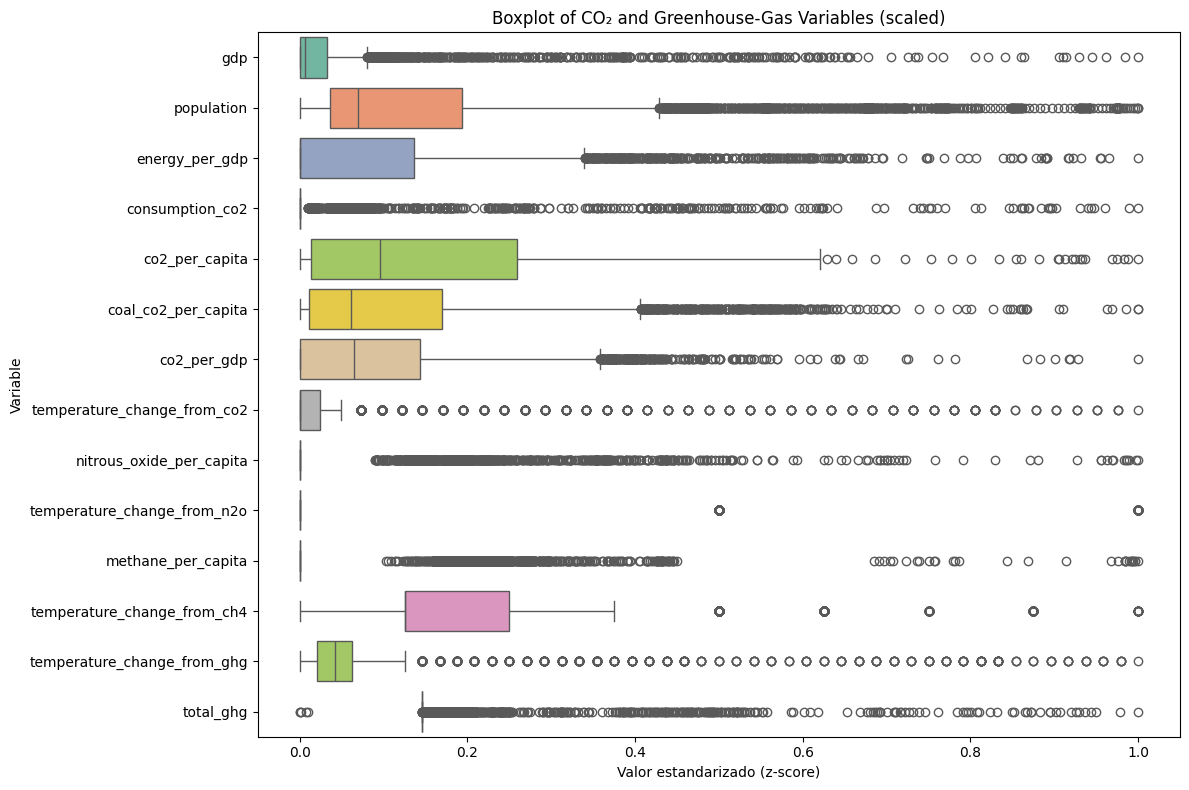

In [127]:
# We scale the data using StandardScaler to standardize the variables:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_co2_eu_num)

scaled_df = pd.DataFrame(data_scaled, index=data_co2_eu_num.index, columns=data_co2_eu_num.columns)

# We make the boxplot out of the scaled data:
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_df, orient='h', palette='Set2')
plt.title('Boxplot of CO₂ and Greenhouse-Gas Variables (scaled)')
plt.xlabel('Valor estandarizado (z-score)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

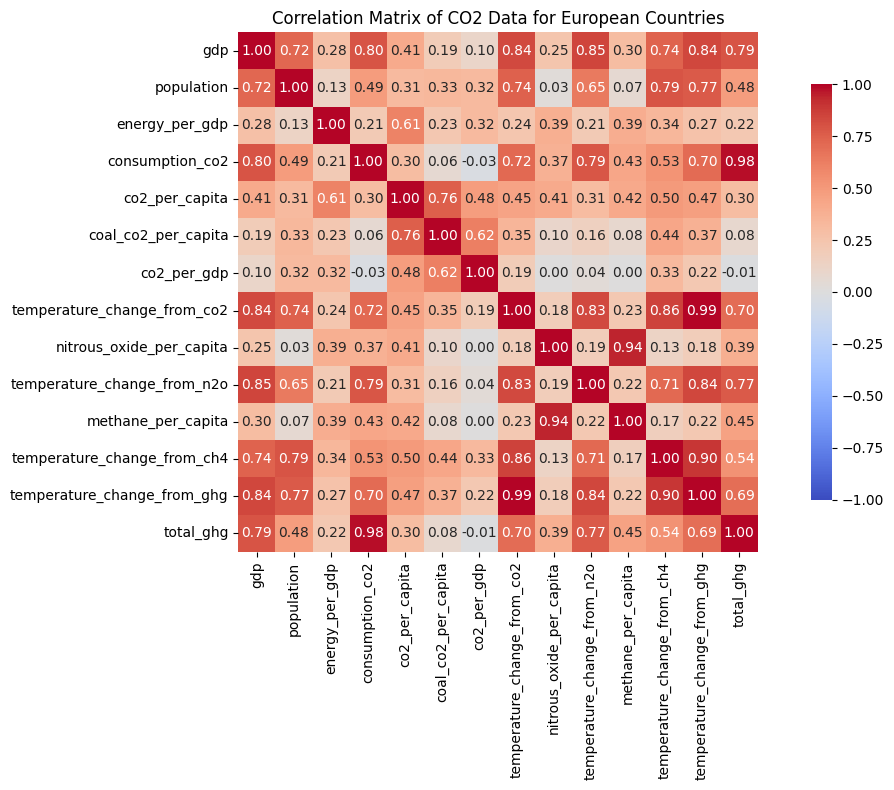

In [128]:
# We calculate the correlation matrix:
data_co2_eu_corr = data_co2_eu_num.corr()

# We plot the correlation matrix:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_co2_eu_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    vmin=-1.00,
    center=0.00,
    vmax=1.00
)
plt.title('Correlation Matrix of CO2 Data for European Countries')
plt.tight_layout()
plt.show()

## Analysis and preparation of the Earth Temperature Data By Country dataset

In [129]:
# We import the CSV and filter the temperature data for the same European countries:
data_temps = pd.read_csv('./data/Merged_Temperature_Dataset_1750 _2024.csv')
data_temps_eu = data_temps[data_temps['Country'].isin(europe_countries)]

### Data Preprocessing and exploration

In [130]:
data_temps_eu.head(10)

Year  Month  Adjusted Temperature   Country
3   1743     11                 2.482   Austria
5   1743     11                 7.106   Belgium
7   1743     11                 5.928  Bulgaria
8   1743     11                 7.225   Croatia
11  1743     11                 0.727   Estonia
13  1743     11                -3.571   Finland
15  1743     11                10.203    France
16  1743     11                 5.468   Germany
17  1743     11                10.806    Greece
19  1743     11                 5.041   Hungary

In [131]:
# We filter the data by a row for each country:
data_temps_eu.groupby('Country').first().reset_index()

Country  Year  Month  Adjusted Temperature
0          Austria  1743     11                 2.482
1          Belgium  1743     11                 7.106
2         Bulgaria  1743     11                 5.928
3          Croatia  1743     11                 7.225
4          Denmark  1823      1               -29.446
5          Estonia  1743     11                 0.727
6          Finland  1743     11                -3.571
7           France  1743     11                10.203
8          Germany  1743     11                 5.468
9           Greece  1743     11                10.806
10         Hungary  1743     11                 5.041
11         Ireland  1743     11                 7.730
12           Italy  1743     11                 9.538
13          Latvia  1743     11                 0.936
14       Lithuania  1743     11                 1.981
15     Netherlands  1743     11                 8.009
16          Norway  1743     11                -3.503
17          Poland  1743     11                 3.937
18        Portugal  1753      1                 6.431
19         Romania  1743     11                 3.890
20        Slovakia  1743     11                 3.697
21        Slovenia  1743     11                 5.668
22           Spain  1743     11                 9.346
23          Sweden  1743     11                -1.444
24     Switzerland  1743     11                 3.572
25  United Kingdom  1743     11                 7.086

In [132]:
data_temps_eu.groupby(['Country', 'Year'], as_index=False).head(10)

Year  Month  Adjusted Temperature         Country
3       1743     11              2.482000         Austria
5       1743     11              7.106000         Belgium
7       1743     11              5.928000        Bulgaria
8       1743     11              7.225000         Croatia
11      1743     11              0.727000         Estonia
...      ...    ...                   ...             ...
759751  2024     10             12.734458        Slovenia
759758  2024     10             16.557757           Spain
759762  2024     10              5.665978          Sweden
759763  2024     10              8.898699     Switzerland
759776  2024     10             11.564016  United Kingdom

[72228 rows x 4 columns]

In [133]:
# We create another dataframe out of this one, and what we need is to sum all the temperatures of each month, for each year and for each country, make a new column to make the average temperature for each year, and only leave the Country, Year, and Average Temperature columns:
annual_avg_temps = (data_temps_eu.groupby(['Country', 'Year'], as_index=False)['Adjusted Temperature'].mean().rename(columns={'Adjusted Temperature': 'Average Temperature'}).copy())

# We make sure that it only contains the columns we need:
annual_avg_temps.head(20)

Country  Year  Average Temperature
0   Austria  1743             2.482000
1   Austria  1744             7.784750
2   Austria  1745            -0.977250
3   Austria  1746                  NaN
4   Austria  1747                  NaN
5   Austria  1748                  NaN
6   Austria  1749                  NaN
7   Austria  1750             6.983545
8   Austria  1751             7.185000
9   Austria  1752             1.821500
10  Austria  1753             6.138917
11  Austria  1754             5.907333
12  Austria  1755             5.671917
13  Austria  1756             6.463583
14  Austria  1757             6.097167
15  Austria  1758             5.363417
16  Austria  1759             6.363833
17  Austria  1760             6.379500
18  Austria  1761             6.572583
19  Austria  1762             6.080583

In [134]:
# Now show the average temperature for each country in the last 10 years:
annual_avg_temps_last_10_years = annual_avg_temps[annual_avg_temps['Year'] >= 2014].copy()
annual_avg_temps_last_10_years = annual_avg_temps_last_10_years.sort_values(by='Year', ascending=False).reset_index(drop=True)
annual_avg_temps_last_10_years.head(10)

Country  Year  Average Temperature
0  United Kingdom  2024            10.725485
1          Sweden  2024             4.966799
2        Bulgaria  2024            14.133669
3           Spain  2024            16.022508
4          France  2024            15.078077
5         Finland  2024             4.265681
6         Austria  2024             9.309704
7         Belgium  2024            12.074436
8          Latvia  2024             9.235452
9     Switzerland  2024             7.487884

In [135]:
data_temps_eu['Adjusted Temperature'].describe().round(3)

count    107920.000
mean          8.092
std           9.179
min         -36.830
25%           2.352
50%           8.872
75%          15.108
max          28.795
Name: Adjusted Temperature, dtype: float64

In [136]:
annual_avg_temps['Average Temperature'].describe().round(3)

count    7146.000
mean        7.961
std         5.339
min       -20.268
25%         5.993
50%         8.755
75%        10.958
max        17.698
Name: Average Temperature, dtype: float64

## Analysis and preparation of the Global Electric Vehicle Sales Data dataset

In [137]:
# We also import the CSV and filter the data for electric vehicles (EVs) in Europe:
data_ev = pd.read_csv('./data/Global EV Data 2024.csv')
data_ev_eu = data_ev[data_ev['region'].isin(europe_countries)]

### Data Preprocessing and exploration

In [138]:
data_ev_eu.head(10)

region    category           parameter  mode               powertrain  \
94   Austria  Historical            EV stock  Cars                      BEV   
95   Austria  Historical      EV stock share  Cars                       EV   
96   Austria  Historical      EV stock share  Cars                       EV   
97   Austria  Historical  EV charging points    EV  Publicly available fast   
98   Austria  Historical  EV charging points    EV  Publicly available slow   
99   Austria  Historical            EV stock  Cars                      BEV   
100  Austria  Historical            EV stock  Cars                      BEV   
101  Austria  Historical            EV stock  Cars                     PHEV   
102  Austria  Historical  EV charging points    EV  Publicly available fast   
103  Austria  Historical  EV charging points    EV  Publicly available slow   

     year             unit      value  
94   2010         Vehicles   350.0000  
95   2010          percent     0.0079  
96   2011          percent     0.0220  
97   2011  charging points     0.1000  
98   2011  charging points     0.1000  
99   2011         Vehicles   990.0000  
100  2012         Vehicles  1400.0000  
101  2012         Vehicles   140.0000  
102  2012  charging points     0.1000  
103  2012  charging points     0.1000

In [139]:
# Show one row of each country where unit column value is equal to 'Vehicles':
data_ev_eu[data_ev_eu['unit'] == 'Vehicles'].groupby('region').first().reset_index()

region    category parameter    mode powertrain  year      unit  \
0          Austria  Historical  EV stock    Cars        BEV  2010  Vehicles   
1          Belgium  Historical  EV stock   Buses        BEV  2010  Vehicles   
2         Bulgaria  Historical  EV sales    Cars        BEV  2015  Vehicles   
3          Croatia  Historical  EV sales    Cars        BEV  2019  Vehicles   
4   Czech Republic  Historical  EV sales    Cars        BEV  2015  Vehicles   
5          Denmark  Historical  EV sales  Trucks        BEV  2010  Vehicles   
6          Estonia  Historical  EV sales    Cars        BEV  2015  Vehicles   
7          Finland  Historical  EV sales    Cars        BEV  2011  Vehicles   
8           France  Historical  EV sales   Buses        BEV  2010  Vehicles   
9          Germany  Historical  EV sales    Vans       FCEV  2010  Vehicles   
10          Greece  Historical  EV sales    Cars        BEV  2013  Vehicles   
11         Hungary  Historical  EV sales    Cars       PHEV  2015  Vehicles   
12         Ireland  Historical  EV sales    Cars        BEV  2015  Vehicles   
13           Italy  Historical  EV sales    Vans        BEV  2010  Vehicles   
14          Latvia  Historical  EV sales    Cars       PHEV  2015  Vehicles   
15       Lithuania  Historical  EV sales    Cars        BEV  2015  Vehicles   
16     Netherlands  Historical  EV stock    Cars       PHEV  2010  Vehicles   
17          Norway  Historical  EV stock    Cars       PHEV  2010  Vehicles   
18          Poland  Historical  EV sales    Vans        BEV  2010  Vehicles   
19        Portugal  Historical  EV sales    Cars        BEV  2010  Vehicles   
20         Romania  Historical  EV sales    Cars        BEV  2015  Vehicles   
21        Slovakia  Historical  EV sales    Cars        BEV  2015  Vehicles   
22        Slovenia  Historical  EV sales    Cars       PHEV  2016  Vehicles   
23           Spain  Historical  EV sales    Cars        BEV  2010  Vehicles   
24          Sweden  Historical  EV sales    Cars        BEV  2010  Vehicles   
25     Switzerland  Historical  EV sales    Cars        BEV  2011  Vehicles   
26  United Kingdom  Historical  EV sales    Vans        BEV  2010  Vehicles   

    value  
0   350.0  
1     3.0  
2    21.0  
3   190.0  
4   300.0  
5     4.0  
6    34.0  
7    30.0  
8    16.0  
9     2.0  
10    3.0  
11   15.0  
12  470.0  
13  210.0  
14    9.0  
15   37.0  
16   11.0  
17    2.0  
18    3.0  
19   13.0  
20   24.0  
21   52.0  
22   46.0  
23   76.0  
24    4.0  
25  400.0  
26  230.0

In [140]:
# We convert 'value' to int64:
data_ev_eu['value'] = data_ev_eu['value'].astype('int64')

# Describe the data of the 'value' column if 'unit' is equal to 'Vehicles':
data_ev_eu[data_ev_eu['unit'] == 'Vehicles']['value'].describe().round(1)

C:\Users\Javier\AppData\Local\Temp\ipykernel_15436\824295572.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count       2575.0
mean       17195.8
std        75656.0
min            1.0
25%           25.0
50%          250.0
75%         3200.0
max      1500000.0
Name: value, dtype: float64

In [141]:
# We create a new DataFrame where there is going to be a column called EV, and every cell of it will be a sum of all the values in the column 'value', of every year and for each country, where the unit is equal to 'Vehicles':
data_ev_eu_vehicles = data_ev_eu[data_ev_eu['unit'] == 'Vehicles'].copy()
data_ev_eu_vehicles = data_ev_eu_vehicles.groupby(['region', 'year'], as_index=False)['value'].sum().rename(columns={'value': 'EV'}).copy()
data_ev_eu_vehicles = data_ev_eu_vehicles.sort_values(by='year', ascending=False).reset_index(drop=True)

# We show an example of 15 rows where the region is equal to 'Spain':
data_ev_eu_vehicles[data_ev_eu_vehicles["region"] == "Spain"].head(15)

region  year      EV
7    Spain  2023  519239
44   Spain  2022  327204
58   Spain  2021  235089
90   Spain  2020  140306
111  Spain  2019   71025
137  Spain  2018   46420
163  Spain  2017   27697
201  Spain  2016   15660
226  Spain  2015    9422
250  Spain  2014    5721
263  Spain  2013    2844
277  Spain  2012    1750
295  Spain  2011     890
309  Spain  2010     152

In [142]:
data_ev_eu_vehicles['EV'].describe().round(3).reset_index()

index           EV
0  count      313.000
1   mean   141466.923
2    std   378559.103
3    min        6.000
4    25%     1018.000
5    50%     8614.000
6    75%    96886.000
7    max  3331035.000

## Merging of the three DataFrames

In [143]:
# We create a new DataFrame where we only have the categorical and numerical variables we need:
data_co2_eu_merged = data_co2_eu_num_with_year_country

# We convert 'population' to int64:
data_co2_eu_merged['population'] = data_co2_eu_merged['population'].astype('int64')

In [144]:
data_co2_eu_merged[data_co2_eu_merged['country'] == 'Spain'].head(30)

gdp  population  energy_per_gdp  consumption_co2  \
41140  0.000000e+00    13041601             0.0              0.0   
41141  0.000000e+00    13128533             0.0              0.0   
41142  0.000000e+00    13216052             0.0              0.0   
41143  0.000000e+00    13304164             0.0              0.0   
41144  0.000000e+00    13392863             0.0              0.0   
41145  2.264679e+10    13482154             0.0              0.0   
41146  0.000000e+00    13572039             0.0              0.0   
41147  0.000000e+00    13662525             0.0              0.0   
41148  0.000000e+00    13753613             0.0              0.0   
41149  0.000000e+00    13845298             0.0              0.0   
41150  0.000000e+00    13937584             0.0              0.0   
41151  0.000000e+00    14030474             0.0              0.0   
41152  0.000000e+00    14123973             0.0              0.0   
41153  0.000000e+00    14218084             0.0              0.0   
41154  0.000000e+00    14312822             0.0              0.0   
41155  2.497295e+10    14408192             0.0              0.0   
41156  0.000000e+00    14504197             0.0              0.0   
41157  0.000000e+00    14600842             0.0              0.0   
41158  0.000000e+00    14698130             0.0              0.0   
41159  0.000000e+00    14790851             0.0              0.0   
41160  2.540916e+10    14878948             0.0              0.0   
41161  2.575528e+10    14962372             0.0              0.0   
41162  2.687317e+10    15041059             0.0              0.0   
41163  2.701776e+10    15114951             0.0              0.0   
41164  2.745147e+10    15189206             0.0              0.0   
41165  2.894571e+10    15263826             0.0              0.0   
41166  2.768580e+10    15338812             0.0              0.0   
41167  2.692261e+10    15414166             0.0              0.0   
41168  2.754312e+10    15489891             0.0              0.0   
41169  2.901741e+10    15561625             0.0              0.0   

       co2_per_capita  coal_co2_per_capita  co2_per_gdp  \
41140           0.000                0.000        0.000   
41141           0.000                0.000        0.000   
41142           0.000                0.000        0.000   
41143           0.000                0.000        0.000   
41144           0.000                0.000        0.000   
41145           0.000                0.000        0.000   
41146           0.002                0.002        0.000   
41147           0.003                0.003        0.000   
41148           0.002                0.002        0.000   
41149           0.003                0.003        0.000   
41150           0.003                0.003        0.000   
41151           0.007                0.007        0.000   
41152           0.010                0.010        0.000   
41153           0.012                0.012        0.000   
41154           0.014                0.014        0.000   
41155           0.019                0.019        0.011   
41156           0.019                0.019        0.000   
41157           0.018                0.018        0.000   
41158           0.020                0.020        0.000   
41159           0.022                0.022        0.000   
41160           0.033                0.033        0.019   
41161           0.034                0.034        0.020   
41162           0.036                0.036        0.020   
41163           0.043                0.043        0.024   
41164           0.036                0.036        0.020   
41165           0.036                0.036        0.019   
41166           0.049                0.049        0.027   
41167           0.055                0.055        0.032   
41168           0.074                0.074        0.042   
41169           0.105                0.105        0.056   

       temperature_change_from_co2  nitrous_oxide_per_capita  \
41140        

### CO2 and Greenhouse Gases with Temperatures dataset merging

In [145]:
# We merge data_co2_eu_merged with annual_avg_temps by 'country' and 'year', and we rename the column 'Average Temperature' to 'avg_temp':
data_co2_temps_eu_merged = data_co2_eu_merged.merge(annual_avg_temps.rename(columns={'Average Temperature': 'avg_temp'}), left_on=['country', 'year'], right_on=['Country', 'Year'], how='left').drop(columns=['Country', 'Year']).copy()
data_co2_temps_eu_merged.head(30)

gdp  population  energy_per_gdp  consumption_co2  co2_per_capita  \
0   0.000000e+00     3124310             0.0              0.0           0.054   
1   0.000000e+00     3349015             0.0              0.0           0.075   
2   6.539229e+09     3367266             0.0              0.0           0.099   
3   0.000000e+00     3385004             0.0              0.0           0.106   
4   0.000000e+00     3402223             0.0              0.0           0.108   
5   0.000000e+00     3418916             0.0              0.0           0.102   
6   0.000000e+00     3435691             0.0              0.0           0.116   
7   0.000000e+00     3452549             0.0              0.0           0.117   
8   0.000000e+00     3469489             0.0              0.0           0.132   
9   0.000000e+00     3486512             0.0              0.0           0.137   
10  0.000000e+00     3503619             0.0              0.0           0.131   
11  0.000000e+00     3520820             0.0              0.0           0.135   
12  7.889740e+09     3538115             0.0              0.0           0.140   
13  0.000000e+00     3555505             0.0              0.0           0.135   
14  0.000000e+00     3572991             0.0              0.0           0.144   
15  0.000000e+00     3590572             0.0              0.0           0.119   
16  0.000000e+00     3608240             0.0              0.0           0.162   
17  0.000000e+00     3625995             0.0              0.0           0.175   
18  0.000000e+00     3643838             0.0              0.0           0.185   
19  0.000000e+00     3661768             0.0              0.0           0.193   
20  0.000000e+00     3679786             0.0              0.0           0.231   
21  0.000000e+00     3698789             0.0              0.0           0.286   
22  8.974140e+09     3718786             0.0              0.0           0.314   
23  0.000000e+00     3739787             0.0              0.0           0.353   
24  0.000000e+00     3761804             0.0              0.0           0.388   
25  0.000000e+00     3784847             0.0              0.0           0.335   
26  0.000000e+00     3808031             0.0              0.0           0.419   
27  0.000000e+00     3831357             0.0              0.0           0.470   
28  0.000000e+00     3854826             0.0              0.0           0.548   
29  0.000000e+00     3878438             0.0              0.0           0.537   

    coal_co2_per_capita  co2_per_gdp  temperature_change_from_co2  \
0                 0.054        0.000                          0.0   
1                 0.075        0.000                          0.0   
2                 0.099        0.051                          0.0   
3                 0.106        0.000                          0.0   
4                 0.108        0.000                          0.0   
5                 0.102        0.000                          0.0   
6                 0.116        0.000                          0.0   
7                 0.117        0.000                          0.0   
8                 0.132        0.000                          0.0   
9                 0.137        0.000                          0.0   
10                0.131        0.000                          0.0   
11                0.135        0.000                          0.0   
12                0.140        0.063                          0.0   
13                0.135        0.000                          0.0   
14                0.144        0.000                          0.0   
15                0.119        0.000                          0.0   
16                0.162        0.000                          0.0   
17                0.175        0.000                          0.0   
18                0.185        0.000                          0.0   
19                0.193        0.000                          0.0   
20                0.231        0.000                

### Merging of the previous dataframe with the EVs dataset

In [146]:
# We merge data_co2_temps_eu_merged with data_ev_eu_vehicles by 'country' and 'year':
data_co2_temps_ev_eu_merged = data_co2_temps_eu_merged.merge(data_ev_eu_vehicles, left_on=['country', 'year'], right_on=['region', 'year'], how='left').drop(columns=['region']).copy()

# We show the last 30 rows of the merged DataFrame where the country is equal to 'Spain':
data_co2_temps_ev_eu_merged[data_co2_temps_ev_eu_merged['country'] == 'Spain'].head(30)

gdp  population  energy_per_gdp  consumption_co2  \
4068  0.000000e+00    13041601             0.0              0.0   
4069  0.000000e+00    13128533             0.0              0.0   
4070  0.000000e+00    13216052             0.0              0.0   
4071  0.000000e+00    13304164             0.0              0.0   
4072  0.000000e+00    13392863             0.0              0.0   
4073  2.264679e+10    13482154             0.0              0.0   
4074  0.000000e+00    13572039             0.0              0.0   
4075  0.000000e+00    13662525             0.0              0.0   
4076  0.000000e+00    13753613             0.0              0.0   
4077  0.000000e+00    13845298             0.0              0.0   
4078  0.000000e+00    13937584             0.0              0.0   
4079  0.000000e+00    14030474             0.0              0.0   
4080  0.000000e+00    14123973             0.0              0.0   
4081  0.000000e+00    14218084             0.0              0.0   
4082  0.000000e+00    14312822             0.0              0.0   
4083  2.497295e+10    14408192             0.0              0.0   
4084  0.000000e+00    14504197             0.0              0.0   
4085  0.000000e+00    14600842             0.0              0.0   
4086  0.000000e+00    14698130             0.0              0.0   
4087  0.000000e+00    14790851             0.0              0.0   
4088  2.540916e+10    14878948             0.0              0.0   
4089  2.575528e+10    14962372             0.0              0.0   
4090  2.687317e+10    15041059             0.0              0.0   
4091  2.701776e+10    15114951             0.0              0.0   
4092  2.745147e+10    15189206             0.0              0.0   
4093  2.894571e+10    15263826             0.0              0.0   
4094  2.768580e+10    15338812             0.0              0.0   
4095  2.692261e+10    15414166             0.0              0.0   
4096  2.754312e+10    15489891             0.0              0.0   
4097  2.901741e+10    15561625             0.0              0.0   

      co2_per_capita  coal_co2_per_capita  co2_per_gdp  \
4068           0.000                0.000        0.000   
4069           0.000                0.000        0.000   
4070           0.000                0.000        0.000   
4071           0.000                0.000        0.000   
4072           0.000                0.000        0.000   
4073           0.000                0.000        0.000   
4074           0.002                0.002        0.000   
4075           0.003                0.003        0.000   
4076           0.002                0.002        0.000   
4077           0.003                0.003        0.000   
4078           0.003                0.003        0.000   
4079           0.007                0.007        0.000   
4080           0.010                0.010        0.000   
4081           0.012                0.012        0.000   
4082           0.014                0.014        0.000   
4083           0.019                0.019        0.011   
4084           0.019                0.019        0.000   
4085           0.018                0.018        0.000   
4086           0.020                0.020        0.000   
4087           0.022                0.022        0.000   
4088           0.033                0.033        0.019   
4089           0.034                0.034        0.020   
4090           0.036                0.036        0.020   
4091           0.043                0.043        0.024   
4092           0.036                0.036        0.020   
4093           0.036                0.036        0.019   
4094           0.049                0.049        0.027   
4095           0.055                0.055        0.032   
4096           0.074                0.074        0.042   
4097           0.105                0.105        0.056   

      temperature_change_from_co2  nitrous_oxide_per_capita  \
4068                          0.0                       0.0   
4069        

# PRÁCTICA DE VISUALIZACIÓN DE DATOS: PARTE 2

## Finding colinearities in the data

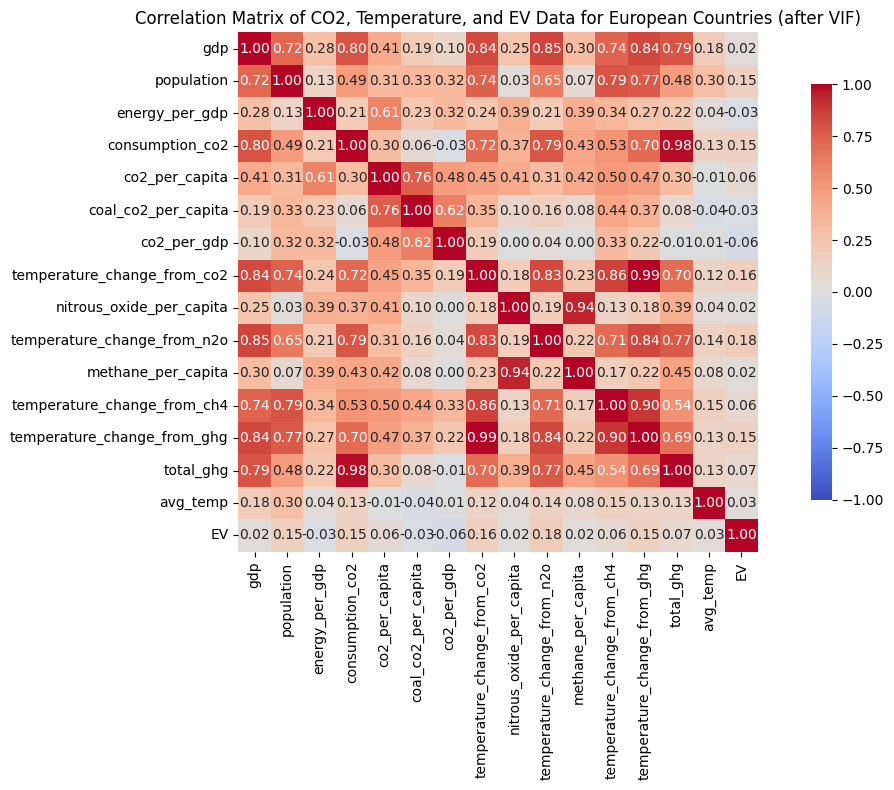

In [147]:
# We convert year to datetime64:
data_co2_temps_ev_eu_merged['year'] = pd.to_datetime(data_co2_temps_ev_eu_merged['year'], format='%Y')

# We convert all NaN values to 0:
data_co2_temps_ev_eu_merged.fillna(0, inplace=True)

# We calculate the correlation matrix of the merged DataFrame with the numerical data using the numerical = True parameter:
data_co2_temps_ev_eu_merged_corr = data_co2_temps_ev_eu_merged.corr(numeric_only=True)

# We plot the correlation matrix:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_co2_temps_ev_eu_merged_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    vmin=-1,
    center=0,
    vmax=1
)
plt.title('Correlation Matrix of CO2, Temperature, and EV Data for European Countries (after VIF)')
plt.tight_layout()
plt.show()

In [148]:
# We select the numerical columns for the VIF calculation:
data_co2_temps_ev_eu_merged_num = data_co2_temps_ev_eu_merged.select_dtypes(include='number')

# We add a constant to the DataFrame for the VIF calculation:
data_co2_temps_ev_eu_merged_num = sm.add_constant(data_co2_temps_ev_eu_merged_num)

# We calculate the VIF for each variable:
vif_data = pd.DataFrame()
vif_data['Variable'] = data_co2_temps_ev_eu_merged_num.columns
vif_data['VIF'] = [variance_inflation_factor(data_co2_temps_ev_eu_merged_num.values, i) for i in range(data_co2_temps_ev_eu_merged_num.shape[1])]

# We show the VIF data:
vif_data = vif_data[vif_data['Variable'] != 'const'].sort_values(by='VIF', ascending=False).reset_index(drop=True)
vif_data.round(2)

Variable     VIF
0   temperature_change_from_ghg  234.96
1   temperature_change_from_co2  160.79
2               consumption_co2   28.81
3                     total_ghg   27.10
4            methane_per_capita   10.74
5      nitrous_oxide_per_capita    9.76
6                           gdp    7.98
7   temperature_change_from_ch4    7.08
8                co2_per_capita    6.54
9   temperature_change_from_n2o    5.64
10          coal_co2_per_capita    5.04
11                   population    4.45
12               energy_per_gdp    2.41
13                  co2_per_gdp    1.97
14                           EV    1.37
15                     avg_temp    1.18

In [149]:
# Then we decide to drop some of the high VIF, or very correlated variables:
data_co2_temps_ev_eu_merged_num = data_co2_temps_ev_eu_merged_num.drop(columns=['consumption_co2', 'temperature_change_from_co2', 'temperature_change_from_ch4', 'temperature_change_from_n2o', 'coal_co2_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita'])

# We calculate the VIF again after dropping the variables:
vif_data = pd.DataFrame()
vif_data['Variable'] = data_co2_temps_ev_eu_merged_num.columns
vif_data['VIF'] = [variance_inflation_factor(data_co2_temps_ev_eu_merged_num.values, i) for i in range(data_co2_temps_ev_eu_merged_num.shape[1])]

# We show the VIF data again:
vif_data = vif_data[vif_data['Variable'] != 'const'].sort_values(by='VIF', ascending=False).reset_index(drop=True)
vif_data.round(2)

Variable   VIF
0                          gdp  6.16
1  temperature_change_from_ghg  5.10
2                   population  3.75
3                    total_ghg  3.01
4               co2_per_capita  2.26
5               energy_per_gdp  1.65
6                  co2_per_gdp  1.64
7                     avg_temp  1.15
8                           EV  1.13

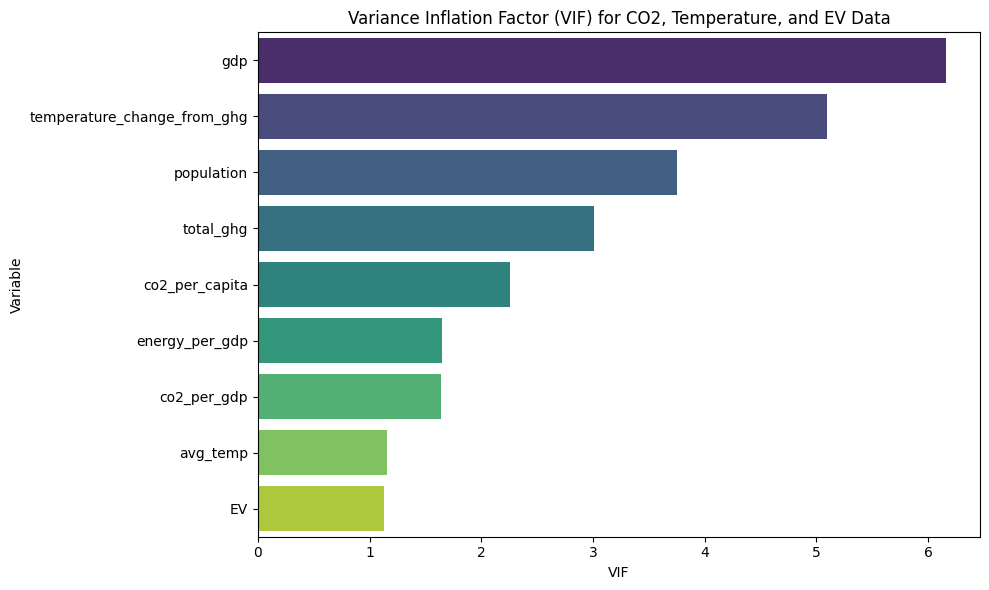

In [150]:
# We make a graph of the VIF data:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', hue='Variable', data=vif_data, palette='viridis', legend=False)
plt.title('Variance Inflation Factor (VIF) for CO2, Temperature, and EV Data')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

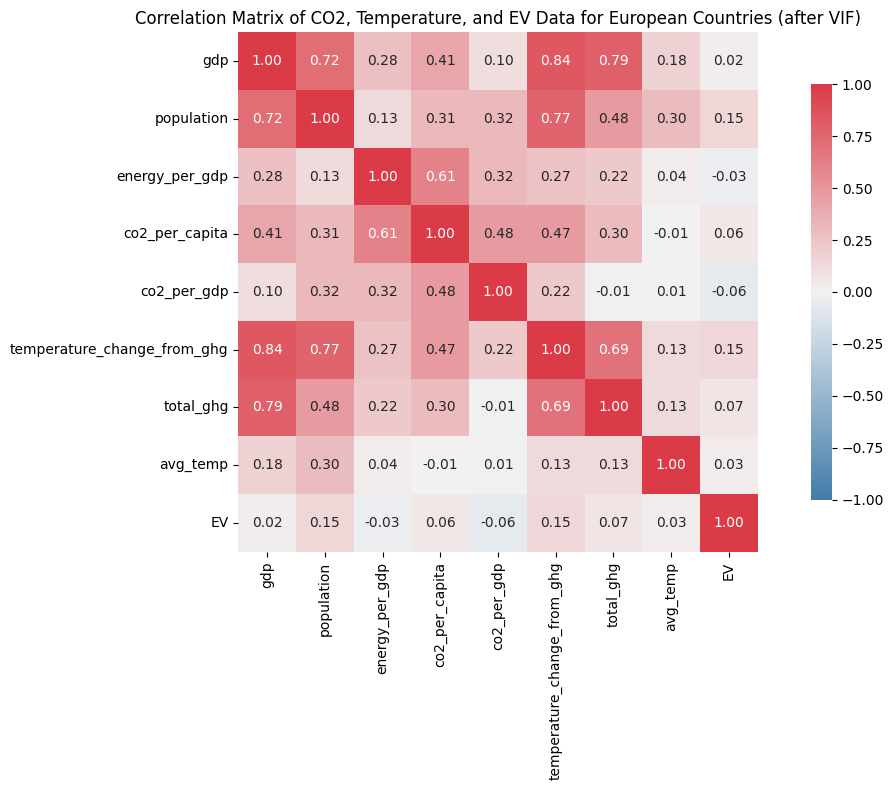

In [151]:
# We make the correlation matrix again after dropping the variables:
data_co2_temps_ev_eu_corr = data_co2_temps_ev_eu_merged_num.drop(columns='const').corr(numeric_only=True)

# We plot the correlation matrix:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_co2_temps_ev_eu_corr,
    annot=True,
    fmt='.2f',
    cmap=sns.diverging_palette(240, 10, as_cmap=True),
    square=True,
    cbar_kws={"shrink": .8},
    vmin=-1,
    vmax=1,
    center=0
)
plt.title('Correlation Matrix of CO2, Temperature, and EV Data for European Countries (after VIF)')
plt.tight_layout()
plt.show()

## Last cleanup of the data and saving it in a CSV file

In [152]:
# We add the 'year' and 'country' columns to the numerical DataFrame and call it `data_co2_temps_ev_eu_final`:
data_co2_temps_ev_eu_final = data_co2_temps_ev_eu_merged_num.copy()
data_co2_temps_ev_eu_final['year'] = data_co2_temps_ev_eu_merged['year']
data_co2_temps_ev_eu_final['country'] = data_co2_temps_ev_eu_merged['country']

# We also delete the 'const' column:
data_co2_temps_ev_eu_final = data_co2_temps_ev_eu_final.drop(columns='const')

# We change the 'avg_temp' to 2 decimal places:
data_co2_temps_ev_eu_final['avg_temp'] = data_co2_temps_ev_eu_final['avg_temp'].round(2)

# We convert 'EV' to int64:
data_co2_temps_ev_eu_final['EV'] = data_co2_temps_ev_eu_final['EV'].astype('int64')

# We make sure that the 'year' only shows the year, not the month and day:
data_co2_temps_ev_eu_final['year'] = data_co2_temps_ev_eu_final['year'].dt.year

# We convert 'energy_per_gdp' to float64 with 3 decimal places:
data_co2_temps_ev_eu_final['energy_per_gdp'] = data_co2_temps_ev_eu_final['energy_per_gdp'].astype('float64').round(3)

# We drop the gdp column because it has a high correlation with 'population' and 'energy_per_gdp':
data_co2_temps_ev_eu_final = data_co2_temps_ev_eu_final.drop(columns='gdp')

# We show the last 20 rows of the final DataFrame:
data_co2_temps_ev_eu_final.tail(30)

population  energy_per_gdp  co2_per_capita  co2_per_gdp  \
4862    57647464           1.686          10.054        0.379   
4863    57785900           1.605           9.934        0.362   
4864    57930364           1.572           9.773        0.349   
4865    58078584           1.609          10.103        0.353   
4866    58250192           1.535           9.660        0.328   
4867    58438320           1.501           9.729        0.322   
4868    58635204           1.448           9.579        0.308   
4869    58850044           1.410           9.669        0.301   
4870    59092016           1.388           9.781        0.298   
4871    59355688           1.326           9.439        0.282   
4872    59649800           1.302           9.583        0.279   
4873    59995852           1.281           9.558        0.273   
4874    60383740           1.256           9.445        0.264   
4875    60803700           1.211           9.339        0.257   
4876    61260680           1.149           9.134        0.247   
4877    61742152           1.137           8.826        0.242   
4878    62243384           1.129           7.938        0.230   
4879    62760048           1.133           8.157        0.234   
4880    63286360           1.054           7.422        0.211   
4881    63808728           1.057           7.640        0.217   
4882    64302296           1.034           7.428        0.208   
4883    64773504           0.948           6.774        0.186   
4884    65224368           0.942           6.477        0.175   
4885    65655204           0.915           6.084        0.162   
4886    66064808           0.899           5.863        0.155   
4887    66432996           0.883           5.716        0.149   
4888    66778660           0.000           5.462        0.000   
4889    67059472           0.000           4.865        0.000   
4890    67281040           0.000           5.164        0.000   
4891    67508936           0.000           4.720        0.000   

      temperature_change_from_ghg  total_ghg  avg_temp       EV  year  \
4862                        0.035     734.26      8.93        0  1993   
4863                        0.035     731.86      9.48        0  1994   
4864                        0.035     724.11      9.76        0  1995   
4865                        0.036     745.84      8.81        0  1996   
4866                        0.036     725.57     10.02        0  1997   
4867                        0.036     723.42      9.78        0  1998   
4868                        0.036     699.68      9.98        0  1999   
4869                        0.037     701.79      9.69        0  2000   
4870                        0.037     711.88      9.41        0  2001   
4871                        0.037     693.65     10.01        0  2002   
4872                        0.037     702.40     10.04        0  2003   
4873                        0.037     697.02     10.02        0  2004   
4874                        0.038     690.82      9.96        0  2005   
4875                        0.038     687.09     10.25        0  2006   
4876                        0.038     671.69     10.11        0  2007   
4877                        0.038     651.07      9.60        0  2008   
4878                        0.038     594.77      9.71        0  2009   
4879                        0.038     607.41      8.57     6749  2010   
4880                        0.038     565.57     10.20     8614  2011   
4881                        0.038     585.43      9.27    12594  2012   
4882                        0.038     567.81      9.32    16507  2013   
4883                        0.039     528.21     10.76    41827  2014   
4884                        0.039     512.98     10.03    83410  2015   
4885                        0.039     493.00     10.14   131598  2016   
4886                        0.039     476.57     10.45   186852  2017   
4887                        0.039     468.34     10.31   258795  2018   
4888               

In [153]:
data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['country'] == 'Spain'].head(30)

population  energy_per_gdp  co2_per_capita  co2_per_gdp  \
4068    13041601             0.0           0.000        0.000   
4069    13128533             0.0           0.000        0.000   
4070    13216052             0.0           0.000        0.000   
4071    13304164             0.0           0.000        0.000   
4072    13392863             0.0           0.000        0.000   
4073    13482154             0.0           0.000        0.000   
4074    13572039             0.0           0.002        0.000   
4075    13662525             0.0           0.003        0.000   
4076    13753613             0.0           0.002        0.000   
4077    13845298             0.0           0.003        0.000   
4078    13937584             0.0           0.003        0.000   
4079    14030474             0.0           0.007        0.000   
4080    14123973             0.0           0.010        0.000   
4081    14218084             0.0           0.012        0.000   
4082    14312822             0.0           0.014        0.000   
4083    14408192             0.0           0.019        0.011   
4084    14504197             0.0           0.019        0.000   
4085    14600842             0.0           0.018        0.000   
4086    14698130             0.0           0.020        0.000   
4087    14790851             0.0           0.022        0.000   
4088    14878948             0.0           0.033        0.019   
4089    14962372             0.0           0.034        0.020   
4090    15041059             0.0           0.036        0.020   
4091    15114951             0.0           0.043        0.024   
4092    15189206             0.0           0.036        0.020   
4093    15263826             0.0           0.036        0.019   
4094    15338812             0.0           0.049        0.027   
4095    15414166             0.0           0.055        0.032   
4096    15489891             0.0           0.074        0.042   
4097    15561625             0.0           0.105        0.056   

      temperature_change_from_ghg  total_ghg  avg_temp  EV  year country  
4068                          0.0        0.0     13.48   0  1830   Spain  
4069                          0.0        0.0     13.79   0  1831   Spain  
4070                          0.0        0.0     13.31   0  1832   Spain  
4071                          0.0        0.0     13.24   0  1833   Spain  
4072                          0.0        0.0     14.20   0  1834   Spain  
4073                          0.0        0.0     13.10   0  1835   Spain  
4074                          0.0        0.0     13.24   0  1836   Spain  
4075                          0.0        0.0     13.22   0  1837   Spain  
4076                          0.0        0.0     13.39   0  1838   Spain  
4077                          0.0        0.0     13.31   0  1839   Spain  
4078                          0.0        0.0     13.18   0  1840   Spain  
4079                          0.0        0.0     13.38   0  1841   Spain  
4080                          0.0        0.0     13.37   0  1842   Spain  
4081                          0.0        0.0     13.55   0  1843   Spain  
4082                          0.0        0.0     13.37   0  1844   Spain  
4083                          0.0        0.0     13.01   0  1845   Spain  
4084                          0.0        0.0     14.01   0  1846   Spain  
4085                          0.0        0.0     13.44   0  1847   Spain  
4086                          0.0        0.0     13.12   0  1848   Spain  
4087                          0.0        0.0     13.46   0  1849   Spain  
4088                          0.0        0.0     13.53   0  1850   Spain  
4089                          0.0        0.0     13.25   0  1851   Spain  
4090                          0.0        0.0     13.96   0  1852   Spain  
4091                          0.0        0.0     12.70   0  1853   Spain  
4092                          0.0        0.0     13.28   0  1854   Spain  
4093                          0.0       

In [154]:
# We save the final DataFrame to a CSV file:
data_co2_temps_ev_eu_final.to_csv('./data/co2_temps_ev_eu_final.csv', index=False)

## Making graphs of the final DataFrame

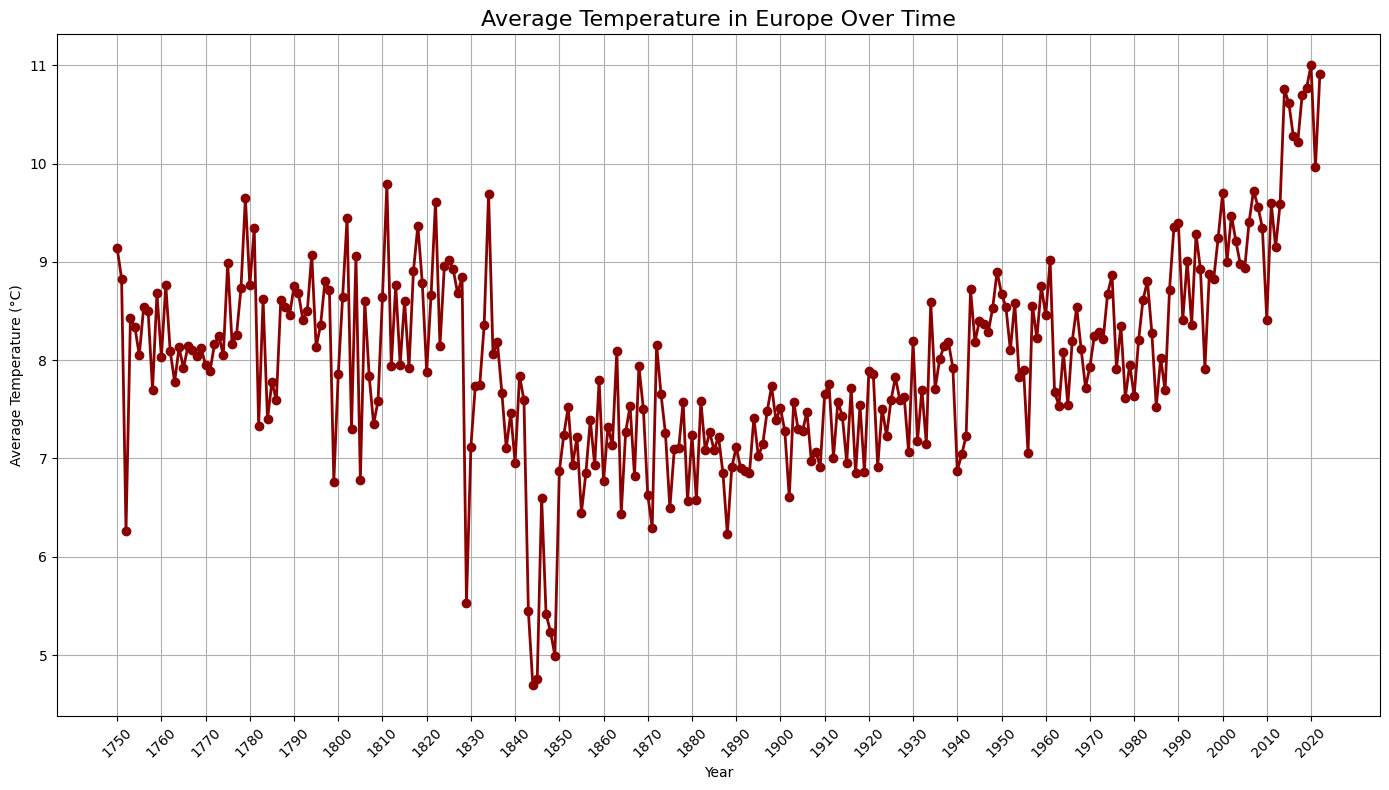

In [155]:
# Make a single line graph of the average temperature for each country in during the whole period of the dataset:
# We group the data by year and calculate the average temperature for each year:
avg_temp_by_year = data_co2_temps_ev_eu_final.groupby('year')['avg_temp'].mean().reset_index()

# We make a line graph of the average temperature by year:
plt.figure(figsize=(14, 8))
plt.plot(avg_temp_by_year['year'], avg_temp_by_year['avg_temp'], marker='o', color='darkred', linewidth=2)

# Filter the x-axis to show only every 10 years:
years_every_10 = [year for year in avg_temp_by_year['year'] if year % 10 == 0]
plt.xticks(ticks=years_every_10, rotation=45)

# Title and labels:
plt.title('Average Temperature in Europe Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.savefig("graphs/Average_temps_Europe_over_time.png", dpi=300)
plt.show()

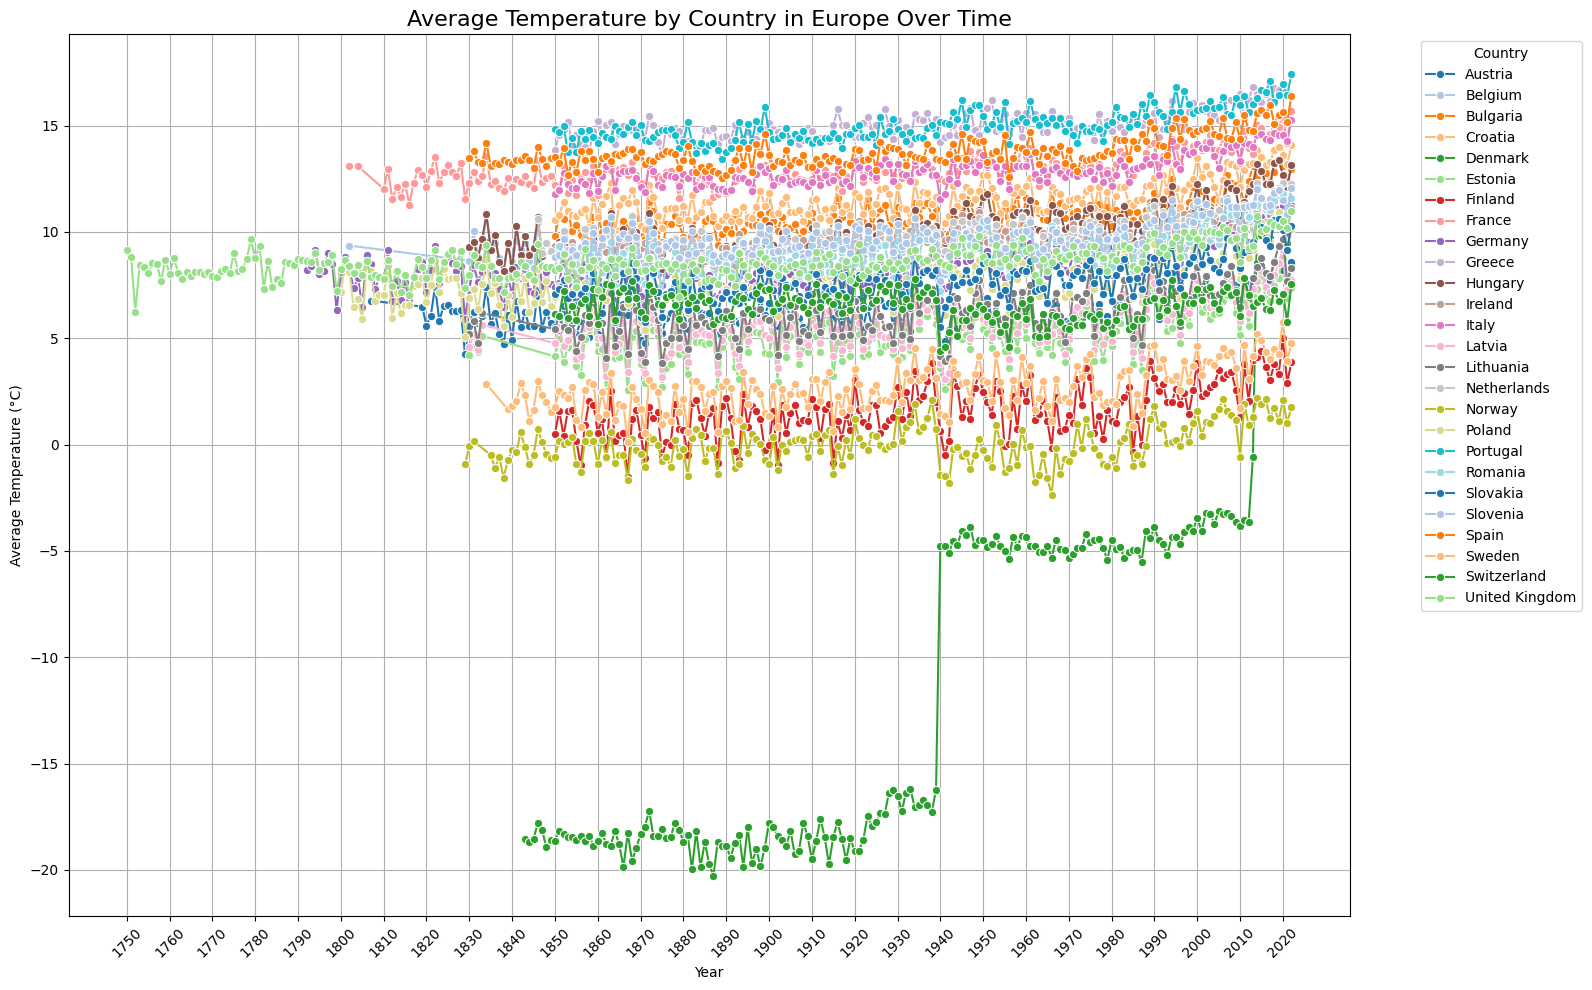

In [156]:
# Make a line plot by country and year, showing the average temperature for each country in the dataset:
plt.figure(figsize=(16, 10))
sns.lineplot(data=data_co2_temps_ev_eu_final, x='year', y='avg_temp', hue='country', marker='o', palette='tab20', legend='full')
plt.title('Average Temperature by Country in Europe Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(years_every_10, rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("graphs/Average_temps_Europe_country_over_time.png", dpi=300)
plt.show()

In [157]:
# Filter the DataFrame to only include years from 1750 to 1900:
period_1750_1900 = data_co2_temps_ev_eu_final[
    (data_co2_temps_ev_eu_final['year'] >= 1750) &
    (data_co2_temps_ev_eu_final['year'] <= 1900)
]

# Group the data by country and calculate the average values:
summary = period_1750_1900.groupby('country').agg({
    'avg_temp': 'mean',
    'population': 'mean',
    'co2_per_capita': 'mean',
    'energy_per_gdp': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

# Rename the columns for clarity:
summary.columns = ['Country', 'Average Temperature', 'Average Population', 'CO2 per Capita', 'Energy per GDP', 'CO2 per GDP']

# Load the shapefile for world countries using GeoPandas:
world = gpd.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filter the world GeoDataFrame to only include the selected European countries:
europe_map = world[world['NAME'].isin(europe_countries)].copy()

# Merge the summary DataFrame with the European map GeoDataFrame:
europe_map = europe_map.merge(summary, left_on='NAME', right_on='Country', how='left')

# Format the numerical columns to 3 decimal places and handle NaN values:
europe_map['Average Temperature (f)'] = europe_map['Average Temperature'].map(lambda x: f"{x:.3f}" if pd.notna(x) else 'N/A')
europe_map['Average Population (f)'] = europe_map['Average Population'].map(lambda x: f"{x:,.0f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per Capita (f)'] = europe_map['CO2 per Capita'].map(lambda x: f"{x:.3f}" if pd.notna(x) else 'N/A')
europe_map['Energy per GDP (f)'] = europe_map['Energy per GDP'].map(lambda x: f"{x:.3f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per GDP (f)'] = europe_map['CO2 per GDP'].map(lambda x: f"{x:.3f}" if pd.notna(x) else 'N/A')

# Calculate the min, median, and max temperatures for colormap scaling:
min_temp = europe_map['Average Temperature'].min()
midpoint = 0
max_temp = europe_map['Average Temperature'].max()

# Create the custom diverging colormap for average temperature:
colormap = LinearColormap(
    ['#2166ac', '#f7f7f7', '#b2182b'],
    index=[min_temp, midpoint, max_temp],
    vmin=min_temp,
    vmax=max_temp
)
colormap.caption = 'Avg. Temperature (°C) 1750–1900'

# Create the Folium map centered on Europe:
m1 = folium.Map(location=[54, 15], zoom_start=4)

# Add the GeoJson layer with tooltips and styling to the map:
folium.GeoJson(
    europe_map,
    name='European Countries',
    tooltip=folium.GeoJsonTooltip(
        fields=[
            'NAME',
            'Average Temperature (f)',
            'Average Population (f)',
            'CO2 per Capita (f)',
            'Energy per GDP (f)',
            'CO2 per GDP (f)'
        ],
        aliases=[
            'Country:',
            'Avg. Temperature (°C):',
            'Avg. Population:',
            'Avg. CO₂ per Capita:',
            'Avg. Energy per GDP:',
            'Avg. CO₂ per GDP:'
        ],
        localize=True,
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Average Temperature']) if feature['properties']['Average Temperature'] is not None else 'lightgray',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }
).add_to(m1)

# Add the color legend to the map:
colormap.add_to(m1)

# Display the map:
m1

In [158]:
# We can save the map to an HTML file to view it interactively:
m1.save("graphs/interactive_temperature_map_1750-1900.html")

In [159]:
# Filter the DataFrame to only include years from 1750 to 1900:
period_1750_1900 = data_co2_temps_ev_eu_final[
    (data_co2_temps_ev_eu_final['year'] >= 1750) &
    (data_co2_temps_ev_eu_final['year'] <= 1900)
]

# Group the data by country and calculate the average values:
summary = period_1750_1900.groupby('country').agg({
    'avg_temp': 'mean',
    'population': 'mean',
    'co2_per_capita': 'mean',
    'energy_per_gdp': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

# Rename the columns for clarity:
summary.columns = ['Country', 'Average Temperature', 'Average Population', 'CO2 per Capita', 'Energy per GDP', 'CO2 per GDP']

# Load shapefile and filter Europe:
world = gpd.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
europe_map = world[world['NAME'].isin(europe_countries)].copy()

# Merge with the summary:
europe_map = europe_map.merge(summary, left_on='NAME', right_on='Country', how='left')

# Format the numerical columns using English separators:
europe_map['Average Temperature (f)'] = europe_map['Average Temperature'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Average Population (f)'] = europe_map['Average Population'].map(lambda x: f"{x:,.0f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per Capita (f)'] = europe_map['CO2 per Capita'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Energy per GDP (f)'] = europe_map['Energy per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per GDP (f)'] = europe_map['CO2 per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')

# Create the colormap for CO₂ per Capita:
min_co2 = 0
max_co2 = europe_map['CO2 per Capita'].max()

colormap = LinearColormap(
    colors=['#ffffff', '#333333'],
    vmin=min_co2,
    vmax=max_co2
)
colormap.caption = 'Avg. CO₂ per Capita (1750–1900)'

# Create the Folium map centered on Europe:
m2 = folium.Map(location=[54, 15], zoom_start=4)

# Add the GeoJson layer with tooltips and styling:
folium.GeoJson(
    europe_map,
    name='European Countries',
    tooltip=folium.GeoJsonTooltip(
        fields=[
            'NAME',
            'Average Temperature (f)',
            'Average Population (f)',
            'CO2 per Capita (f)',
            'Energy per GDP (f)',
            'CO2 per GDP (f)'
        ],
        aliases=[
            'Country:',
            'Avg. Temperature (°C):',
            'Avg. Population:',
            'Avg. CO₂ per Capita:',
            'Avg. Energy per GDP:',
            'Avg. CO₂ per GDP:'
        ],
        localize=True,
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['CO2 per Capita']) if feature['properties']['CO2 per Capita'] is not None else 'lightgray',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }
).add_to(m2)

# Add the color legend to the map:
colormap.add_to(m2)

# Show the map:
m2

In [160]:
m2.save("graphs/interactive_co2_map_1750-1900.html")

In [161]:
# Show the average energy per GDP mean for each country in the dataset in a small dataframe of the 1750-1900 period:
avg_energy_per_gdp = period_1750_1900.groupby('country')['energy_per_gdp'].mean().reset_index()
avg_energy_per_gdp = avg_energy_per_gdp.rename(columns={'energy_per_gdp': 'Average Energy per GDP'})
avg_energy_per_gdp = avg_energy_per_gdp.sort_values(by='Average Energy per GDP', ascending=False).reset_index(drop=True)
avg_energy_per_gdp.head(30)

country  Average Energy per GDP
0          Austria                     0.0
1          Belgium                     0.0
2         Bulgaria                     0.0
3          Croatia                     0.0
4          Denmark                     0.0
5          Estonia                     0.0
6          Finland                     0.0
7           France                     0.0
8          Germany                     0.0
9           Greece                     0.0
10         Hungary                     0.0
11         Ireland                     0.0
12           Italy                     0.0
13          Latvia                     0.0
14       Lithuania                     0.0
15     Netherlands                     0.0
16          Norway                     0.0
17          Poland                     0.0
18        Portugal                     0.0
19         Romania                     0.0
20        Slovakia                     0.0
21        Slovenia                     0.0
22           Spain                     0.0
23          Sweden                     0.0
24     Switzerland                     0.0
25  United Kingdom                     0.0

In [162]:
# Get the last 20 years from the 'year' column:
last_20_years = sorted(data_co2_temps_ev_eu_final['year'].unique())[-20:]
print(last_20_years)

# Filter the DataFrame to only include the last 20 years:
last_20_years_data = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['year'].isin(last_20_years)]

# Group by country and calculate average values:
summary = last_20_years_data.groupby('country').agg({
    'avg_temp': 'mean',
    'population': 'mean',
    'co2_per_capita': 'mean',
    'energy_per_gdp': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

summary.columns = ['Country', 'Average Temperature', 'Average Population', 'CO2 per Capita', 'Energy per GDP', 'CO2 per GDP']

# Load shapefile and filter European countries:
world = gpd.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
europe_map = world[world['NAME'].isin(europe_countries)].copy()

# Merge with summary data:
europe_map = europe_map.merge(summary, left_on='NAME', right_on='Country', how='left')

# Format values with English-style separators for tooltip:
europe_map['Average Temperature (f)'] = europe_map['Average Temperature'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Average Population (f)'] = europe_map['Average Population'].map(lambda x: f"{x:,.0f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per Capita (f)'] = europe_map['CO2 per Capita'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Energy per GDP (f)'] = europe_map['Energy per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per GDP (f)'] = europe_map['CO2 per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')

# Create colormap for average temperature:
min_temp = -19
midpoint = 0
max_temp = europe_map['Average Temperature'].max()

colormap = LinearColormap(
    ['#2166ac', '#f7f7f7', '#b2182b'],
    index=[min_temp, midpoint, max_temp],
    vmin=min_temp,
    vmax=max_temp
)
colormap.caption = 'Avg. Temperature (°C) 2003–2022'

# Create Folium map centered on Europe:
m3 = folium.Map(location=[54, 15], zoom_start=4)

# Add GeoJson layer with tooltips using formatted values:
folium.GeoJson(
    europe_map,
    name='European Countries',
    tooltip=GeoJsonTooltip(
        fields=[
            'NAME',
            'Average Temperature (f)',
            'Average Population (f)',
            'CO2 per Capita (f)',
            'Energy per GDP (f)',
            'CO2 per GDP (f)'
        ],
        aliases=[
            'Country:',
            'Avg. Temperature (°C):',
            'Avg. Population:',
            'Avg. CO₂ per Capita:',
            'Avg. Energy per GDP:',
            'Avg. CO₂ per GDP:'
        ],
        localize=True,
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['Average Temperature']) if feature['properties']['Average Temperature'] is not None else 'lightgray',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }
).add_to(m3)

# Add color legend to the map:
colormap.add_to(m3)

# Show the map:
m3

[np.int32(2003), np.int32(2004), np.int32(2005), np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022)]


In [163]:
# We can save the map to an HTML file to view it interactively:
m3.save("graphs/interactive_temperature_map_last_20_years.html")

In [164]:
# Filter the DataFrame:
last_20_years_data = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['year'].isin(last_20_years)]

# Group by country and calculate averages:
summary = last_20_years_data.groupby('country').agg({
    'avg_temp': 'mean',
    'population': 'mean',
    'co2_per_capita': 'mean',
    'energy_per_gdp': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

summary.columns = ['Country', 'Average Temperature', 'Average Population', 'CO2 per Capita', 'Energy per GDP', 'CO2 per GDP']

# Load the shapefile and filter to Europe:
world = gpd.read_file('./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
europe_map = world[world['NAME'].isin(europe_countries)].copy()

# Merge with summary data:
europe_map = europe_map.merge(summary, left_on='NAME', right_on='Country', how='left')

# Format numbers for tooltip with English separators:
europe_map['Average Temperature (f)'] = europe_map['Average Temperature'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Average Population (f)'] = europe_map['Average Population'].map(lambda x: f"{x:,.0f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per Capita (f)'] = europe_map['CO2 per Capita'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['Energy per GDP (f)'] = europe_map['Energy per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')
europe_map['CO2 per GDP (f)'] = europe_map['CO2 per GDP'].map(lambda x: f"{x:,.3f}" if pd.notna(x) else 'N/A')

# Create colormap for CO₂ per Capita: white → dark gray
min_co2 = 0
max_co2 = europe_map['CO2 per Capita'].max()

colormap = LinearColormap(
    colors=['#ffffff', '#333333'],
    vmin=min_co2,
    vmax=max_co2
)
colormap.caption = 'Avg. CO₂ per Capita (2003–2022)'

# Create Folium map
m4 = folium.Map(location=[54, 15], zoom_start=4)

# Add GeoJson layer with tooltips using formatted values:
folium.GeoJson(
    europe_map,
    name='European Countries',
    tooltip=GeoJsonTooltip(
        fields=[
            'NAME',
            'Average Temperature (f)',
            'Average Population (f)',
            'CO2 per Capita (f)',
            'Energy per GDP (f)',
            'CO2 per GDP (f)'
        ],
        aliases=[
            'Country:',
            'Avg. Temperature (°C):',
            'Avg. Population:',
            'Avg. CO₂ per Capita:',
            'Avg. Energy per GDP:',
            'Avg. CO₂ per GDP:'
        ],
        localize=True,
        sticky=True
    ),
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['CO2 per Capita']) if feature['properties']['CO2 per Capita'] is not None else 'lightgray',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }
).add_to(m4)

# Add legend and show map:
colormap.add_to(m4)
m4

In [165]:
m4.save("graphs/interactive_co2_map_last_20_years.html")

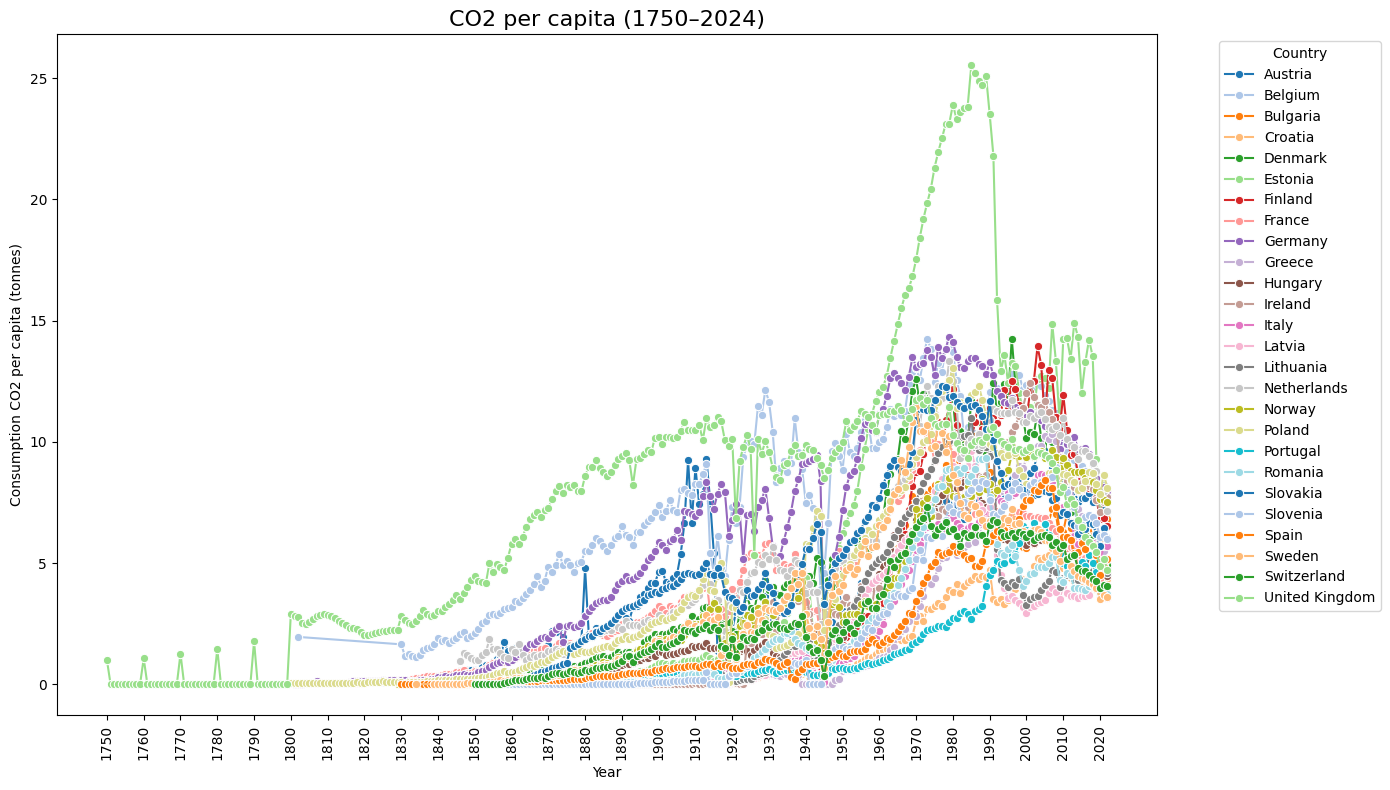

In [166]:
# We make a line graph where the lines are the countries, the x-axis is the year, and the y-axis is the Consumption CO2 per capita:
plt.figure(figsize=(14, 8))

# We graph per capita CO2 emissions for each country over the years:
sns.lineplot(
    data=data_co2_temps_ev_eu_final,
    x='year',
    y='co2_per_capita',
    hue='country',
    marker='o',
    palette='tab20',
    legend='full'
)

# Title and labels:
plt.title('CO2 per capita (1750–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Consumption CO2 per capita (tonnes)')

# We show the years every 10 years on the x-axis:
all_years = sorted(data_co2_temps_ev_eu_final['year'].unique())
years_every_10 = [year for year in all_years if year % 10 == 0]
plt.xticks(ticks=years_every_10, rotation=90)

# Legend and layout:
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("graphs/CO2_per_capita_Europe_over_time.png", dpi=300)
plt.show()


In [167]:
data_co2_temps_ev_eu_final.tail(20)

population  energy_per_gdp  co2_per_capita  co2_per_gdp  \
4872    59649800           1.302           9.583        0.279   
4873    59995852           1.281           9.558        0.273   
4874    60383740           1.256           9.445        0.264   
4875    60803700           1.211           9.339        0.257   
4876    61260680           1.149           9.134        0.247   
4877    61742152           1.137           8.826        0.242   
4878    62243384           1.129           7.938        0.230   
4879    62760048           1.133           8.157        0.234   
4880    63286360           1.054           7.422        0.211   
4881    63808728           1.057           7.640        0.217   
4882    64302296           1.034           7.428        0.208   
4883    64773504           0.948           6.774        0.186   
4884    65224368           0.942           6.477        0.175   
4885    65655204           0.915           6.084        0.162   
4886    66064808           0.899           5.863        0.155   
4887    66432996           0.883           5.716        0.149   
4888    66778660           0.000           5.462        0.000   
4889    67059472           0.000           4.865        0.000   
4890    67281040           0.000           5.164        0.000   
4891    67508936           0.000           4.720        0.000   

      temperature_change_from_ghg  total_ghg  avg_temp       EV  year  \
4872                        0.037     702.40     10.04        0  2003   
4873                        0.037     697.02     10.02        0  2004   
4874                        0.038     690.82      9.96        0  2005   
4875                        0.038     687.09     10.25        0  2006   
4876                        0.038     671.69     10.11        0  2007   
4877                        0.038     651.07      9.60        0  2008   
4878                        0.038     594.77      9.71        0  2009   
4879                        0.038     607.41      8.57     6749  2010   
4880                        0.038     565.57     10.20     8614  2011   
4881                        0.038     585.43      9.27    12594  2012   
4882                        0.038     567.81      9.32    16507  2013   
4883                        0.039     528.21     10.76    41827  2014   
4884                        0.039     512.98     10.03    83410  2015   
4885                        0.039     493.00     10.14   131598  2016   
4886                        0.039     476.57     10.45   186852  2017   
4887                        0.039     468.34     10.31   258795  2018   
4888                        0.039     452.15     10.29   341752  2019   
4889                        0.039     411.12     10.52   613345  2020   
4890                        0.039       0.00     10.17  1066522  2021   
4891                        0.000       0.00     10.97  1383334  2022   

             country  
4872  United Kingdom  
4873  United Kingdom  
4874  United Kingdom  
4875  United Kingdom  
4876  United Kingdom  
4877  United Kingdom  
4878  United Kingdom  
4879  United Kingdom  
4880  United Kingdom  
4881  United Kingdom  
4882  United Kingdom  
4883  United Kingdom  
4884  United Kingdom  
4885  United Kingdom  
4886  United Kingdom  
4887  United Kingdom  
4888  United Kingdom  
4889  United Kingdom  
4890  United Kingdom  
4891  United Kingdom

In [168]:
# Filter for Spain and last 50 years:
spain_df = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['country'] == 'Spain']
last_50_years = sorted(spain_df['year'].unique())[-50:]
spain_df = spain_df[spain_df['year'].isin(last_50_years)].copy()

# Store original values for tooltip:
original_values = spain_df[['year', 'population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']].copy()

# Normalize each column independently to [0, 1]:
variables = ['population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']
for var in variables:
    scaler = MinMaxScaler()
    spain_df[var] = scaler.fit_transform(spain_df[[var]])

# Melt normalized data to long format:
melted = spain_df.melt(id_vars='year', value_vars=variables, var_name='Variable', value_name='Normalized Value')

# Add real (original) value for each row:
def get_real_value(row):
    return original_values.loc[original_values['year'] == row['year'], row['Variable']].values[0]

melted['Real Value'] = melted.apply(get_real_value, axis=1)

# Add formatted value with English separators:
def format_value(row):
    value = row['Real Value']
    if row['Variable'] == 'population':
        return f"{value:,.0f}"
    else:
        return f"{value:,.2f}"

melted['Formatted Value'] = melted.apply(format_value, axis=1)

# Filter out rows where the real value is 0:
melted = melted[melted['Real Value'] > 0]

# Color mapping:
custom_colors = {
    'population': 'blue',
    'total_ghg': 'orange',
    'co2_per_capita': 'green',
    'avg_temp': 'red',
    'EV': 'purple'
}

# Create interactive line chart:
fig = px.line(
    melted,
    x='year',
    y='Normalized Value',
    color='Variable',
    markers=True,
    color_discrete_map=custom_colors,
    hover_data={
        'Variable': True,
        'Formatted Value': True,
        'Normalized Value': False,
        'year': True
    },
    labels={'Formatted Value': 'Original Value', 'year': 'Year'},
    title='Normalized Indicators in Spain (Last 50 Years, Independent Scaling)'
)

# Tooltip formatting:
fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br>' +
                  '<b>Variable:</b> %{customdata[0]}<br>' +
                  '<b>Original Value:</b> %{customdata[1]}<extra></extra>'
)

fig.update_layout(
    xaxis=dict(type='category'),
    yaxis=dict(title='Normalized Value (0–1)'),
    hovermode='x unified'
)

fig.write_html("graphs/Spain_50_years_normalized.html")
fig.show()

In [169]:
# Filter for last 50 years:
last_50_years = sorted(data_co2_temps_ev_eu_final['year'].unique())[-50:]
df_50 = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['year'].isin(last_50_years)].copy()

# Variables to use:
variables = ['population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']

# Replace 0 with NaN:
df_50[variables] = df_50[variables].replace(0, pd.NA)

# Define aggregation: sum for population and EV, mean for the rest:
aggregations = {
    'population': 'sum',
    'total_ghg': 'mean',
    'EV': 'sum',
    'avg_temp': 'mean',
    'co2_per_capita': 'mean'
}

# Group by year:
grouped_50 = df_50.groupby('year').agg(aggregations).reset_index()

# Save real values before normalization:
original_values_50 = grouped_50.copy()

# Normalize each variable independently:
for var in variables:
    scaler = MinMaxScaler()
    grouped_50[var] = scaler.fit_transform(grouped_50[[var]])

# Melt to long format:
melted_50 = grouped_50.melt(id_vars='year', value_vars=variables, var_name='Variable', value_name='Normalized Value')

# Add real value for tooltip:
def get_real_value_50(row):
    return original_values_50.loc[original_values_50['year'] == row['year'], row['Variable']].values[0]

melted_50['Real Value'] = melted_50.apply(get_real_value_50, axis=1)

# Add formatted value with English separators:
def format_value(row):
    value = row['Real Value']
    if row['Variable'] in ['population', 'EV']:
        return f"{value:,.0f}"
    else:
        return f"{value:,.2f}"

melted_50['Formatted Value'] = melted_50.apply(format_value, axis=1)

# Remove 0 or missing values:
melted_50 = melted_50[melted_50['Real Value'] > 0]

# Color mapping:
custom_colors = {
    'population': 'blue',
    'total_ghg': 'orange',
    'co2_per_capita': 'green',
    'avg_temp': 'red',
    'EV': 'purple'
}

# Create interactive chart:
fig = px.line(
    melted_50,
    x='year',
    y='Normalized Value',
    color='Variable',
    markers=True,
    color_discrete_map=custom_colors,
    hover_data={
        'Variable': True,
        'Formatted Value': True,
        'Normalized Value': False,
        'year': True
    },
    labels={'Formatted Value': 'Original Value', 'year': 'Year'},
    title='Normalized Indicators in Europe (Last 50 Years, Mixed Aggregation)'
)

# Tooltip formatting:
fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br>' +
                  '<b>Variable:</b> %{customdata[0]}<br>' +
                  '<b>Original Value:</b> %{customdata[1]}<extra></extra>'
)

fig.update_layout(
    xaxis=dict(type='category'),
    yaxis=dict(title='Normalized Value (0–1)'),
    hovermode='x unified'
)

fig.write_html("graphs/Europe_50_years_normalized.html")
fig.show()


In [170]:
# Filter for Spain and last 100 years:
spain_df = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['country'] == 'Spain']
last_100_years = sorted(spain_df['year'].unique())[-100:]
spain_df = spain_df[spain_df['year'].isin(last_100_years)].copy()

# Store original values for tooltip:
original_values = spain_df[['year', 'population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']].copy()

# Normalize each column independently to [0, 1]:
variables = ['population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']
for var in variables:
    scaler = MinMaxScaler()
    spain_df[var] = scaler.fit_transform(spain_df[[var]])

# Melt normalized data to long format:
melted = spain_df.melt(id_vars='year', value_vars=variables, var_name='Variable', value_name='Normalized Value')

# Add real (original) value for each row:
def get_real_value(row):
    return original_values.loc[original_values['year'] == row['year'], row['Variable']].values[0]

melted['Real Value'] = melted.apply(get_real_value, axis=1)

# Filter out rows with value = 0:
melted = melted[melted['Real Value'] > 0]

# Color mapping:
custom_colors = {
    'population': 'blue',
    'total_ghg': 'orange',
    'co2_per_capita': 'green',
    'avg_temp': 'red',
    'EV': 'purple'
}

# Create interactive line chart:
fig = px.line(
    melted,
    x='year',
    y='Normalized Value',
    color='Variable',
    markers=True,
    color_discrete_map=custom_colors,
    hover_data={
        'Variable': True,
        'Normalized Value': False,
        'Real Value': True,
        'year': True
    },
    labels={'Real Value': 'Original Value', 'year': 'Year'},
    title='Normalized Indicators in Spain (Last 100 Years, Independent Scaling)'
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br>' +
                  '<b>Variable:</b> %{customdata[0]}<br>' +
                  '<b>Original Value:</b> %{customdata[1]:,.2f}<extra></extra>'
)

fig.update_layout(
    xaxis=dict(type='category'),
    yaxis=dict(title='Normalized Value (0–1)'),
    hovermode='x unified'
)

fig.write_html("graphs/Spain_100_years_normalized.html")

fig.show()


In [171]:
# Filter for last 100 years:
last_100_years = sorted(data_co2_temps_ev_eu_final['year'].unique())[-100:]
df = data_co2_temps_ev_eu_final[data_co2_temps_ev_eu_final['year'].isin(last_100_years)].copy()

# Variables to use:
variables = ['population', 'total_ghg', 'co2_per_capita', 'avg_temp', 'EV']

# Replace 0 with NaN (optional):
df[variables] = df[variables].replace(0, pd.NA)

# Define aggregation: sum for population and EV, mean for avg_temp and co2_per_capita:
aggregations = {
    'population': 'sum',
    'total_ghg': 'mean',
    'EV': 'sum',
    'avg_temp': 'mean',
    'co2_per_capita': 'mean'
}

# Group by year with mixed aggregation:
grouped = df.groupby('year').agg(aggregations).reset_index()

# Save real values before normalization:
original_values = grouped.copy()

# Normalize each variable independently:
for var in variables:
    scaler = MinMaxScaler()
    grouped[var] = scaler.fit_transform(grouped[[var]])

# Melt to long format
melted = grouped.melt(id_vars='year', value_vars=variables, var_name='Variable', value_name='Normalized Value')

# Add real total/mean values to tooltip:
def get_real_value(row):
    return original_values.loc[original_values['year'] == row['year'], row['Variable']].values[0]

melted['Real Value'] = melted.apply(get_real_value, axis=1)

# Remove 0 or missing:
melted = melted[melted['Real Value'] > 0]

# Color mapping:
custom_colors = {
    'population': 'blue',
    'total_ghg': 'orange',
    'co2_per_capita': 'green',
    'avg_temp': 'red',
    'EV': 'purple'
}

# Create interactive line chart:
fig = px.line(
    melted,
    x='year',
    y='Normalized Value',
    color='Variable',
    markers=True,
    color_discrete_map=custom_colors,
    hover_data={
        'Variable': True,
        'Normalized Value': False,
        'Real Value': True,
        'year': True
    },
    labels={'Real Value': 'Original Value', 'year': 'Year'},
    title='Normalized Indicators in Europe (Last 100 Years, Mixed Aggregation)'
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br>' +
                  '<b>Variable:</b> %{customdata[0]}<br>' +
                  '<b>Value:</b> %{customdata[1]:,.2f}<extra></extra>'
)

fig.update_layout(
    xaxis=dict(type='category'),
    yaxis=dict(title='Normalized Value (0–1)'),
    hovermode='x unified'
)

fig.write_html("graphs/Europe_100_years_normalized.html")

fig.show()